In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

% load file names 

In [2]:
import os
import pandas as pd

Emil = False

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\EV data"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\Frekvensdata"


In [3]:
import os

# Specify the folder path
folder_path = base_path

# Get a list of all files in the folder
file_names = os.listdir(folder_path)


In [4]:
import os
import pandas as pd

# Create a dictionary to store the loaded dataframes
dataframes = {}

# Create a list to store the dataframe names
dataframe_names = []

# Load the CSV files and store them in the dictionary
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    dataframe_name = file_name  # Remove the ".csv" extension and the first 3 characters, so only the CD numer is there
    dataframes[dataframe_name] = pd.read_csv(file_path, parse_dates=['Time'])
    dataframe_names.append(dataframe_name)


In [ ]:
A_d = [0 for _ in range(60 * 24 * 365)]
A_u = [0 for _ in range(60 * 24 * 365)]

count = 0 

for d in range(364):
    #start_time += pd.Timedelta(days=1)
    # Load your CSV file
    df = dataframes[dataframe_names[d]]

    # Define your start and end times
    current_time = df['Time'][0]


    print(d)
    j = 0
    end_j = False 
    for t in range(24):
        for m in range(60):
            current_time += pd.Timedelta(minutes=1)
            m_ts = 0 # number of times stamps in the given minute
            if end_j == False:
                while current_time > df['Time'][j]:
                    m_ts = m_ts + 1 
                    f_d = -50 + df['Value'][j]  # get the difference from normel freq

                    # compute the down regualtion activation 
                    if f_d < -0.1:
                        f_d = f_d+0.1
                        ac = f_d/(-0.4)
                        if ac > 1:
                            ac = 1  
                            print(j)
                        A_d[m + (t-1)*60 +(d-1)*1440 ] = A_d[m + (t-1)*60 +(d-1)*1440 ]+ac

                    # compute the up regualtion activation 
                    if f_d > 0.1:
                        f_d = f_d-0.1
                        ac = f_d/(0.4)
                        if ac > 1:
                            ac = 1 
                            print(j)
                        A_u[m + (t-1)*60 +(d-1)*1440 ] = A_u[m + (t-1)*60 +(d-1)*1440 ]+ac
                    
                    if  (50.5 < df['Value'][j] or 49.5 > df['Value'][j]) and ac != 1: # checker 
                        print("there was a mistake!")
                        print(t)
                        print(m)

                    j = j +1
                    
                    if j >= (len(df)-1):
                        end_j = True 
                        break

                if  A_d[m + (t-1)*60 +(d-1)*1440  ] > 0:
                    count = count + 1 # counter number of minutes we're activated
                if m_ts == 0:
                    A_d[m + (t-1)*60 +(d-1)*1440 ] = 0
                else: 
                    A_d[m + (t-1)*60 +(d-1)*1440  ] = A_d[m + (t-1)*60 +(d-1)*1440  ]/m_ts # take the average activation 
                    A_u[m + (t-1)*60 +(d-1)*1440  ] = A_u[m + (t-1)*60 +(d-1)*1440  ]/m_ts # take the average activation 
                
            
        




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


0.00046272278536055593

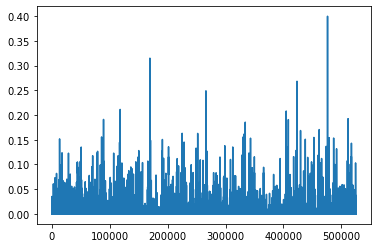

In [28]:
plt.plot(A_d)

sum(A_u)/(60 * 24 * 365)

In [29]:
# Create a DataFrame from the lists
df_activation = pd.DataFrame({'activation upwards': A_u, 'activations downwards': A_d})

# Save the DataFrame to an Excel file
df_activation.to_excel(r'C:\Users\Gustav\Documents\Thesis\data\Activation.xlsx', index=False)



In [27]:
618010/10

24*60*10

14400